<a href="https://www.kaggle.com/code/benzilla987/data445-kaggle-project-2?scriptVersionId=142028139" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Kaggle Project 2

This project will utilize the Retail dataset from Kaggle. The goal of this project is to see how accurately we can predict a customers age based on the other variables that are available in the Retail dataset. 

# Initial exploratory analysis

In [1]:
# Importing relevant libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Reading in the data 
retail=pd.read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")

In [3]:
retail.head(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000


In [4]:
# Looking at the shape of the data 
retail.shape
# 9 variables, 1000 observations

(1000, 9)

In [5]:
## Checking datatypes
retail['Date'] = pd.to_datetime(retail['Date'])
retail.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

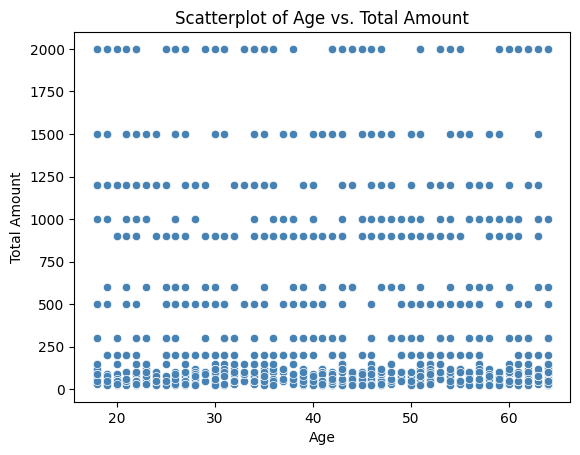

In [6]:
# Creating a scatterplot between age and total amount
sns.scatterplot(data=retail, x='Age', y='Total Amount',color='steelblue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Scatterplot of Age vs. Total Amount')

# Show the plot
plt.show()

In [7]:
## There is no discernable relationship between age and total amount.

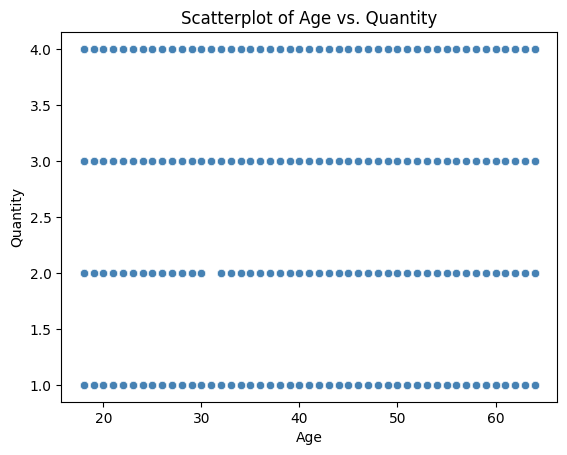

In [8]:
# Creating a scatterplot between age and quantity
sns.scatterplot(data=retail, x='Age', y='Quantity',color='steelblue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.title('Scatterplot of Age vs. Quantity')

# Show the plot
plt.show()

In [9]:
## There is no discernable relationship between age and quantity

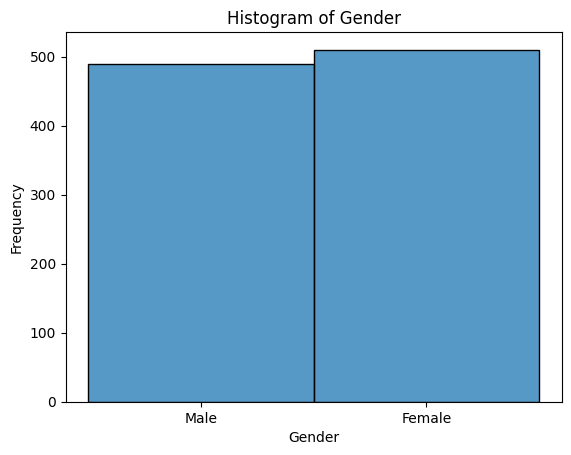

In [10]:
# Create the histogram gender
sns.histplot(data=retail, x='Gender')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Histogram of Gender')

# Show the plot
plt.show()

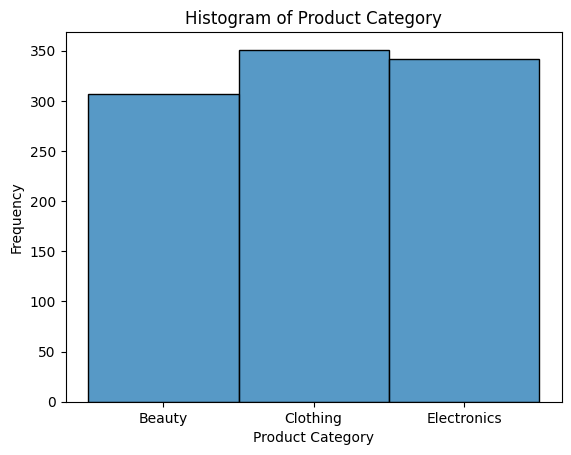

In [11]:
# Creating histogram of Product Category
sns.histplot(data=retail, x='Product Category')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Histogram of Product Category')

# Show the plot
plt.show()

In [12]:
monthly_sales=retail

In [13]:
monthly_sales.set_index('Date', inplace=True)

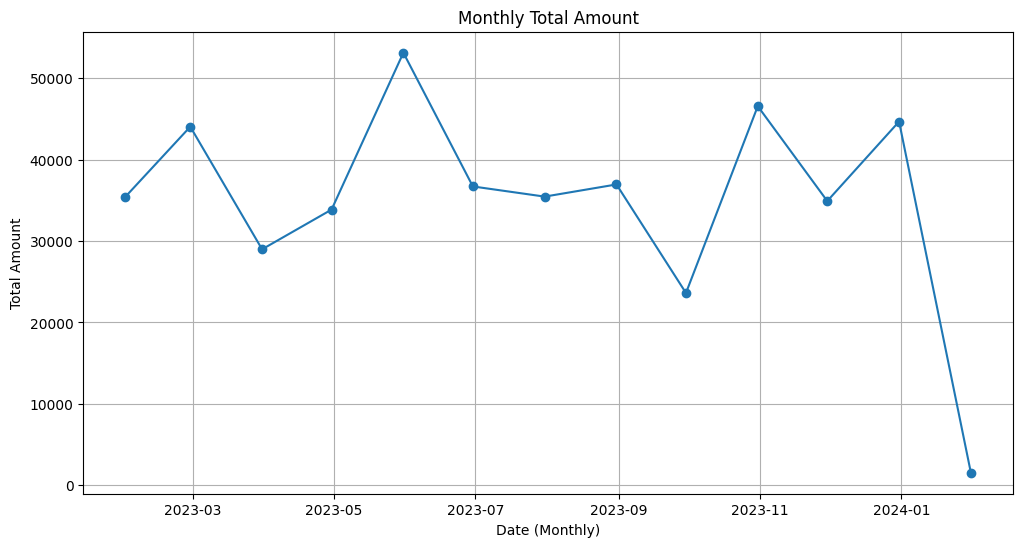

In [14]:
# Aggregate data by month and sum the 'Total Amount' per month
monthly_sales = monthly_sales.resample('M').sum()

# Create a time series plot for monthly total amount
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Amount'], marker='o', linestyle='-')
plt.xlabel('Date (Monthly)')
plt.ylabel('Total Amount')
plt.title('Monthly Total Amount')
plt.grid(True)
plt.show()

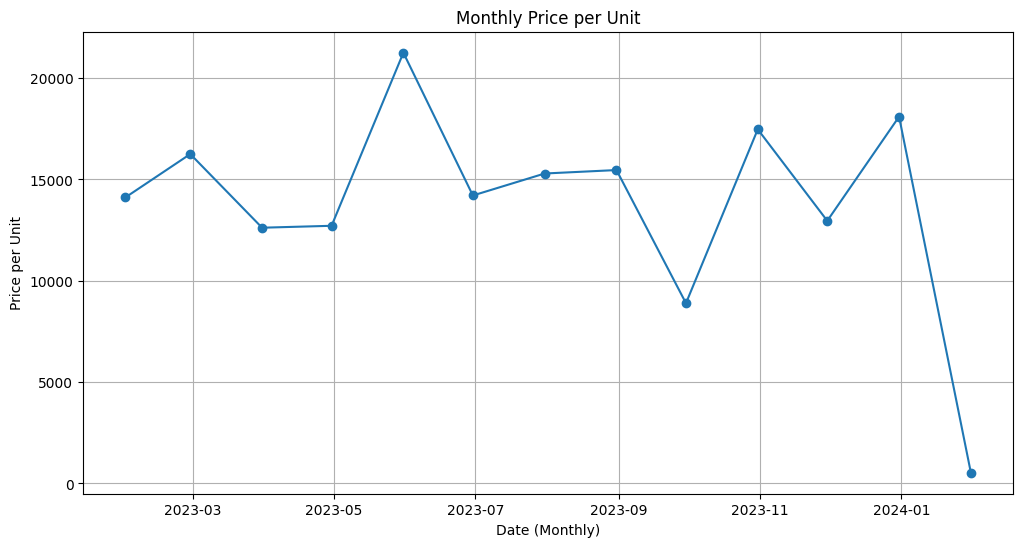

In [15]:
# Create a time series plot for monthly total amount
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Price per Unit'], marker='o', linestyle='-')
plt.xlabel('Date (Monthly)')
plt.ylabel('Price per Unit')
plt.title('Monthly Price per Unit')
plt.grid(True)
plt.show()

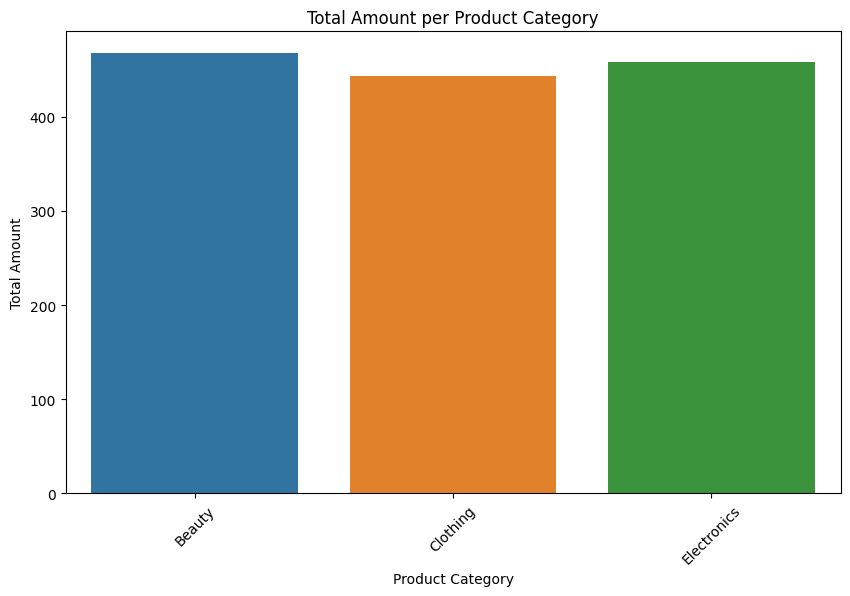

In [16]:
# Create a bar plot of total amount per product category
plt.figure(figsize=(10, 6))
sns.barplot(data=retail, x='Product Category', y='Total Amount', errorbar=None)
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.title('Total Amount per Product Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Using age/gender to try to predict purchasing behavior

In [17]:
# ## Pre-Processing Data

# # # One-hot encoding the 'Product Category' column
# # retail = pd.get_dummies(retail, columns=['Product Category'], prefix='Product_Category', dtype=int)


# # Converting product categories to numerical
# retail['Product Category']=retail['Product Category'].map({'Beauty':0,'Clothing':1, 'Electronics':2}).astype(int)

# # Converting genders to binary
# retail['Gender']=retail['Gender'].map({'Male':0,'Female':1}).astype(int)

In [18]:
# # Determining which variables in the dataframe have the highest correlation
# # with a customer's age.

# # Calculating the correlation matrix
# correlation_matrix=retail.corr()

# # Extrating the correlation of 'Age' with other variables
# age_correlation=correlation_matrix['Age'].drop('Age')

# # Sorting variables by their correlation with age in descending order
# age_correlation_sorted=age_correlation.abs().sort_values(ascending=False)

# # Printing the correlation values
# print(age_correlation_sorted)

# # Creating a heatmap to visualize correlations
# plt.figure(figsize=(10,6))
# sns.heatmap(retail.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show

In [19]:
## From the above chart, it doesn't really make sense to try and predict age. There's not a
## high correlation between age and any of the other provided variables. 

In [20]:
# retail.head(1)

In [21]:
# # Split the data into training and testing sets (e.g., 80% train, 20% test)
# X = retail[['Age', 'Gender']]
# y = retail['Total Amount']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the linear regression model
# model = LinearRegression()

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model's performance
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r2)


In [22]:
## The results indicate that age and gender are not very good predictors of total amount of money spent.
## This is just more evidence that age and gender don't really have high correlation w/anything else
## in this dataset. 